In [1]:
# Imports needed for Project

import pandas as pd
import numpy as np
from matplotlib import pyplot as p
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
from math import sqrt

In [2]:
# Load Data Set from X extraction

sentiments = pd.read_csv("project_data.csv")

In [3]:
# Create subset of data based on Hashtags that were used in the Data Extraction

trump1 = sentiments[sentiments["hashtag"] == '#Trump2024']
trump2 = sentiments[sentiments["hashtag"] == '#MAGA']
trump3 = sentiments[sentiments["hashtag"] == '#MAGA2024']
trump = pd.concat([trump1,trump2,trump3])

biden1 = sentiments[sentiments["hashtag"] == '#Biden']
biden2 = sentiments[sentiments["hashtag"] == '#BidenHarris']
biden3 = sentiments[sentiments["hashtag"] == '#Biden2024']
biden = pd.concat([biden1,biden2,biden3])

genElection1 = sentiments[sentiments["hashtag"] == '#Democrat']
genElection2 = sentiments[sentiments["hashtag"] == '#Republican']
genElection3 = sentiments[sentiments["hashtag"] == '#2024Election']
genElection = pd.concat([genElection1,genElection2,genElection3])

# Added extra column for categorization and evaluation
trump_degree = []
for ii in trump["polarity"]:
    if ii < 0:
        trump_degree.append('negative')
    elif ii > 0:
        trump_degree.append('positive')
    else: trump_degree.append('neutral')
trump['degree'] = trump_degree

biden_degree = []
for ii in biden["polarity"]:
    if ii < 0:
        biden_degree.append('negative')
    elif ii > 0:
        biden_degree.append('positive')
    else: biden_degree.append('neutral')
biden['degree'] = biden_degree

genElection_degree = []
for ii in genElection["polarity"]:
    if ii < 0:
        genElection_degree.append('negative')
    elif ii > 0:
        genElection_degree.append('positive')
    else: genElection_degree.append('neutral')
genElection['degree'] = genElection_degree

In [4]:
# Distribution of degree based on subsets of the original Data Set

trump_class = (trump['degree'].value_counts(normalize=True))*100

print("Distribution of degree of Trump Tweets")
print(pd.DataFrame(trump_class))

biden_class = (biden['degree'].value_counts(normalize=True))*100
print("\n")
print("Distribution of degree of Biden Tweets")
print(pd.DataFrame(biden_class))

genElect_class = (genElection['degree'].value_counts(normalize=True))*100

print("\n")
print("Distribution of degree of General Election Tweets")
print(pd.DataFrame(genElect_class))

Distribution of degree of Trump Tweets
          proportion
degree              
neutral    47.600000
positive   32.666667
negative   19.733333


Distribution of degree of Biden Tweets
          proportion
degree              
neutral    49.000000
positive   32.933333
negative   18.066667


Distribution of degree of General Election Tweets
          proportion
degree              
positive   43.933333
neutral    36.333333
negative   19.733333


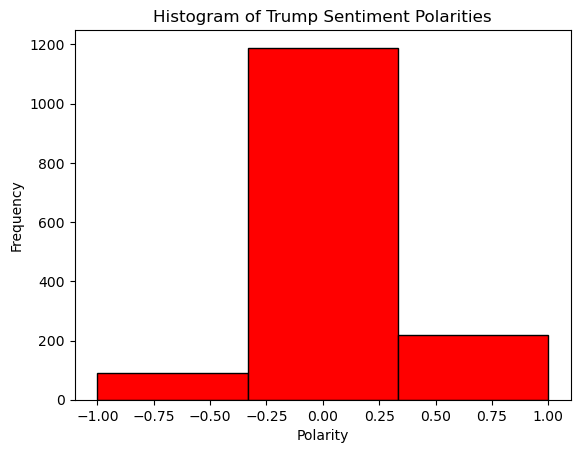

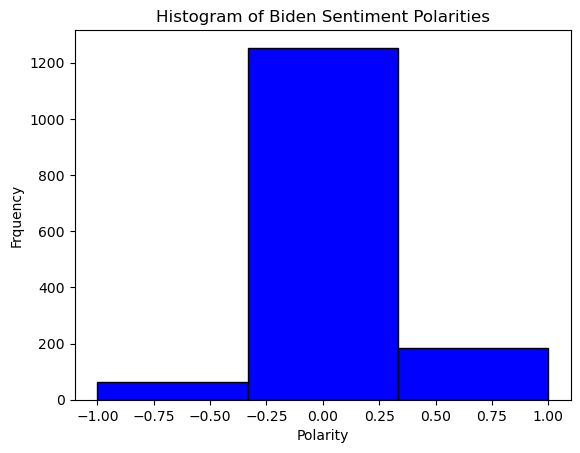

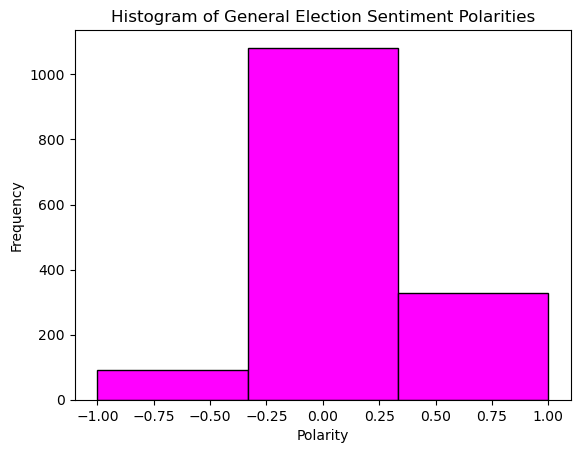

In [5]:
# Histograms of different subsets polarities for Sentiment Analysis

p.hist(trump['polarity'], bins=3, color='red', edgecolor='black')
p.xlabel('Polarity')
p.ylabel('Frequency')
p.title('Histogram of Trump Sentiment Polarities')
p.show()

p.hist(biden['polarity'], bins=3, color='blue', edgecolor='black')
p.xlabel('Polarity')
p.ylabel('Frquency')
p.title('Histogram of Biden Sentiment Polarities')
p.show()

p.hist(genElection['polarity'], bins=3, color='Magenta', edgecolor='black')
p.xlabel('Polarity')
p.ylabel('Frequency')
p.title('Histogram of General Election Sentiment Polarities')
p.show()

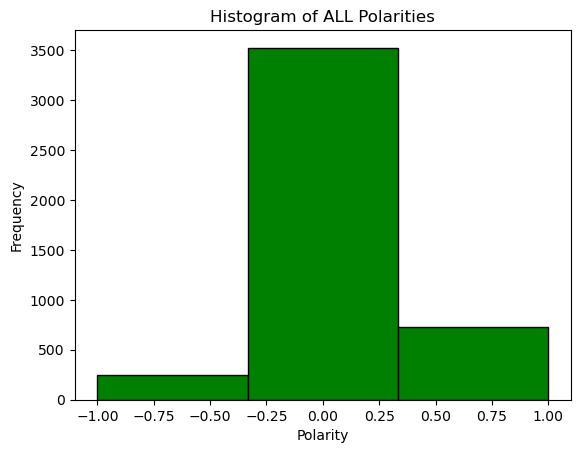

In [6]:
# Histogram of WHOLE Data Set

p.hist(sentiments['polarity'], bins=3, color='green', edgecolor='black')
p.xlabel('Polarity')
p.ylabel('Frequency')
p.title('Histogram of ALL Polarities')
p.show()

In [7]:
# Added degree column to WHOLE Data Set and a number form of degree called whole_number

degree = []
for ii in sentiments["polarity"]:
    if ii < 0:
        degree.append('negative')
    elif ii > 0:
        degree.append('positive')
    else: degree.append('neutral')
        
sentiments['degree'] = degree

whole_number = []
for ii in sentiments["polarity"]:
    if ii < 0:
        whole_number.append(-1)
    elif ii > 0:
        whole_number.append(1)
    else: whole_number.append(0)
        
sentiments['whole_number'] = whole_number
sentiments

,polarity,user,tweet,hashtag,degree,whole_number
0,0.25,1765854407575413028,We all need to watch Trump tonight to show the...,#Trump2024,positive,1
1,0.50,1765854377267323257,Exactlyif TRUMP wouldve done this during the S...,#Trump2024,positive,1
2,0.00,1765854329444192602,Inside Californias bipartisan fight to save ki...,#Trump2024,neutral,0
3,-0.30,1765854306970857521,JoeBiden Your economy sucks Stop the lying amp...,#Trump2024,negative,-1
4,0.00,1765854300918448620,cryptojourneyrs I can feel your excitement for...,#Trump2024,neutral,0
...,...,...,...,...,...,...
4495,0.01,1765527598967538069,NancyMace Hey NaziDrugLord RonnyJacksonTX how ...,#Republican,positive,1
4496,0.00,1765527542289793226,NorthCarolina USA America American Americans S...,#Republican,neutral,0
4497,0.40,1765527374790308343,AngryStaffer This is 100 why a WOMAN has no pl...,#Republican,positive,1
4498,0.01,1765527278317085171,RonnyJacksonTX Hey NaziDrugLord RonnyJacksonTX...,#Republican,positive,1


In [8]:
# Distribution of rows per sentimet

pos = []
neg = []
nu = []

for ii,ee in sentiments.iterrows():
    if ee['degree'] == 'positive':
        pos.append(ee)
    elif ee['degree'] == 'negative':
        neg.append(ee)
    else:
        nu.append(ee)
        
positive = pd.DataFrame(pos)
negative = pd.DataFrame(neg)
neutral = pd.DataFrame(nu)

# Number of tweets per sentiment
posRow,posCol = positive.shape
print("Positive tweets:" + str(posRow))

negRow,negCol = negative.shape
print("Negative tweets:" + str(negRow))

nuRow,nuCol = neutral.shape
print("Neutral tweets:" + str(nuRow))

# Balance Data Set
pos_bal = positive.head(863) 
neg_bal = negative.head(863) 
nu_bal = neutral.head(863) 

# Create a Balanced Data Set
sentiments_bal = pd.DataFrame()
sentiments_bal = pd.concat([pos_bal,neg_bal,nu_bal])
print("\n")
print("Balanced Data Set:")
sentiments_bal

Positive tweets:1643
Negative tweets:863
Neutral tweets:1994


Balanced Data Set:


,polarity,user,tweet,hashtag,degree,whole_number
0,0.250000,1765854407575413028,We all need to watch Trump tonight to show the...,#Trump2024,positive,1
1,0.500000,1765854377267323257,Exactlyif TRUMP wouldve done this during the S...,#Trump2024,positive,1
5,0.051429,1765854251761139990,specialKavon DianePalumbo2 EndWokeness How OLD...,#Trump2024,positive,1
12,0.150000,1765854005723332854,FOXNIIGHTGALAXY Rashida Tlaib Ill be happy to ...,#Trump2024,positive,1
13,0.300000,1765853874731077756,itsFoxCrypto The time is now to unite and push...,#Trump2024,positive,1
...,...,...,...,...,...,...
1776,0.000000,1765836543544226300,charliekirk11 Maybe Bidens gonna take two adde...,#Biden,neutral,0
1778,0.000000,1765836430524416481,Fact CheckRepublicansLieAboutEverything Are th...,#Biden,neutral,0
1781,0.000000,1765836385481613459,RepMTG Marjorie Taylor GreeneIf Joe Biden secu...,#Biden,neutral,0
1784,0.000000,1765836296923082877,StateOfTheUnion Biden BidenAdministration Lets...,#Biden,neutral,0


In [9]:
# Variables for Double Cross Validation
np.random.seed(123)
x = sentiments['tweet']
y = sentiments['whole_number']
y_bal = sentiments_bal['whole_number']
vectorizer = TfidfVectorizer()
x_vec = vectorizer.fit_transform(x.astype('U'))
x_vec_bal = vectorizer.fit_transform(sentiments_bal['tweet'].astype('U'))

In [10]:
np.random.seed(123)
acc = []
best_parameters_svm = {}
# SVM parameters being tested
parameters = {'C': [0.01, 0.1, 0.3], 'gamma': [0.01,0.05], 'kernel': ['rbf', 'linear']}
rus = RandomUnderSampler(random_state=123)
tempy = 0
# Double Cross Validation outer shell
for train, test in KFold(n_splits=5, shuffle=True, random_state=123).split(x_vec):
    X_train, X_test = x_vec[train], x_vec[test]
    y_train, y_test = y[train], y[test]
    
     # Balance out Data Set
    X_train_balanced, y_train_balanced = rus.fit_resample(X_train, y_train)
    
     # 10-Fold Double Cross Validation inner shell
    svm_grid_search = GridSearchCV(svm.SVC(), param_grid=parameters, cv=10, scoring='accuracy')
    svm_grid_search.fit(X_train_balanced, y_train_balanced)
    if tempy != best_parameters_svm or svm_grid_search.best_score_ > acc[-1]:
        best_parameters_svm = svm_grid_search.best_params_
        tempy = svm_grid_search.best_params_
    best_model_svm = svm_grid_search.best_estimator_
    y_pred = best_model_svm.predict(X_test)
    acc_svm = accuracy_score(y_test, y_pred)
    acc.append(acc_svm)
    
    print("iteration complete")
    
# Fit best SVM Model    
best_svm_model = svm.SVC(**best_parameters_svm)
best_svm_model.fit(x_vec_bal, y_bal)

# Best Model Accuracy
svm_acc = accuracy_score(y_bal, best_svm_model.predict(x_vec_bal))

print("SVM Accuracy:", svm_acc)
print("Best Parmeters: ", best_parameters_svm)


# SVM Confusion Matrix and stats
svm_preds = best_svm_model.predict(x_vec_bal)
mat = confusion_matrix(y_bal, svm_preds)
confusion_matrix_df = pd.DataFrame(mat)
print("Confusion Matrix:")
print(confusion_matrix_df)
rmse = sqrt(mean_squared_error(y_bal,svm_preds))
print("RMSE: ", rmse)
print(metrics.classification_report(y_bal, svm_preds, digits=3))

iteration complete
iteration complete
iteration complete
iteration complete
iteration complete
SVM Accuracy: 0.8960988798764001
Best Parmeters:  {'C': 0.3, 'gamma': 0.01, 'kernel': 'linear'}
Confusion Matrix:
     0    1    2
0  791   33   39
1   44  772   47
2   55   51  757
RMSE:  0.4613279570659522
              precision    recall  f1-score   support

          -1      0.889     0.917     0.902       863
           0      0.902     0.895     0.898       863
           1      0.898     0.877     0.887       863

    accuracy                          0.896      2589
   macro avg      0.896     0.896     0.896      2589
weighted avg      0.896     0.896     0.896      2589



In [11]:
np.random.seed(123)
acc = []
best_parameters_random_forest = {}

# Random Forest parameters being tested
parameters = {'n_estimators': [50, 100], 'max_depth': [5, 10, 15,20]}
rus = RandomUnderSampler(random_state=123)
tempy = 0
# Double Cross Validation outer shell
for train, test in KFold(n_splits=5, shuffle=True, random_state=123).split(x_vec):
    X_train, X_test = x_vec[train], x_vec[test]
    y_train, y_test = y[train], y[test]
    
    # Balance out the Data Set
    X_train_balanced, y_train_balanced = rus.fit_resample(X_train, y_train)
    
    # 10-Fold Double Cross Validation inner shell
    rf_grid_search = GridSearchCV(RandomForestClassifier(), param_grid=parameters, cv=10, scoring='accuracy')
    rf_grid_search.fit(X_train_balanced, y_train_balanced)
    if tempy != best_parameters_random_forest or rf_grid_search.best_score_ > acc[-1]:
        best_parameters_random_forest = rf_grid_search.best_params_
        tempy = rf_grid_search.best_params_
    best_model= rf_grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    acc_rf = accuracy_score(y_test, y_pred)
    acc.append(acc_rf)
    print("iteration complete")

# Fit best Random Forest Model
best_random_forest_model = RandomForestClassifier(**best_parameters_random_forest)
best_random_forest_model.fit(x_vec_bal, y_bal)

# Best Model Accuracy
rf_acc = accuracy_score(y_bal, best_random_forest_model.predict(x_vec_bal))

print("Random Forest Accuracy:", rf_acc)
print("Best Parmeters: ", best_parameters_random_forest)

# Random Forest Confusion Matrix and stats
rf_preds =best_random_forest_model.predict(x_vec_bal)
mat = confusion_matrix(y_bal, rf_preds)
confusion_matrix_df = pd.DataFrame(mat)
print("Confusion Matrix:")
print(confusion_matrix_df)
rmse = sqrt(mean_squared_error(y_bal,rf_preds))
print("RMSE: ", rmse)
print(metrics.classification_report(y_bal, rf_preds, digits=3))


iteration complete
iteration complete
iteration complete
iteration complete
iteration complete
Random Forest Accuracy: 0.9073001158748552
Best Parmeters:  {'max_depth': 20, 'n_estimators': 100}
Confusion Matrix:
     0    1    2
0  763   93    7
1   11  848    4
2    3  122  738
RMSE:  0.32293555028950893
              precision    recall  f1-score   support

          -1      0.982     0.884     0.930       863
           0      0.798     0.983     0.881       863
           1      0.985     0.855     0.916       863

    accuracy                          0.907      2589
   macro avg      0.922     0.907     0.909      2589
weighted avg      0.922     0.907     0.909      2589



In [12]:
fake_tweets = pd.DataFrame({
    'X': ["I Hate Donald Trump","I Hate Joe Biden", "I Love Donald Trump","I Love Joe Biden","The election is coming up in November","Biden or Trump could be President","Election day is close", "I am kinda on the fence with Biden", "I am not on the fence with Biden","Republicans are Red and Democrats are Blue", "Do not forget to Vote!"],
    'Polarity Value': [-1,-1,1,1,0,0,0, -1, 1, 0,0]
})
x_vec_test = vectorizer.fit_transform(fake_tweets['X'].astype('U'))
# fit best Random Forest Model
best_rf_model_test = RandomForestClassifier(**best_parameters_random_forest)
best_rf_model_test.fit(x_vec_test, fake_tweets['Polarity Value'])
predictions = best_rf_model_test.predict(x_vec_test)

# Add predictions to the DataFrame as a new column
fake_tweets['RF_Value'] = predictions

# Print the DataFrame with predicted labels
print(fake_tweets)

                                             X  Polarity Value  RF_Value
0                          I Hate Donald Trump              -1        -1
1                             I Hate Joe Biden              -1        -1
2                          I Love Donald Trump               1         1
3                             I Love Joe Biden               1         1
4        The election is coming up in November               0         0
5            Biden or Trump could be President               0         0
6                        Election day is close               0         0
7           I am kinda on the fence with Biden              -1        -1
8             I am not on the fence with Biden               1         1
9   Republicans are Red and Democrats are Blue               0         0
10                      Do not forget to Vote!               0         0
